In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /Users/suvedharam/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


### Import Python Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV file into Pandas Dataframe

In [20]:
filename = path+"/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(filename)

### Data Quality Checks

In [80]:
data.shape

(7043, 21)

There 7043 records and 21 columns in the dataset

In [79]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- customerID can be dropped as it uniquely identifies a customer and has no effect on Churn rate
- Total Charges can be changed to a float type
- Senior citizen can be changed to a categorical variable.

In [97]:
#Customer ID dropped
new_data = data.drop(columns=['customerID'])
#Total charges changed to numeric
new_data['TotalCharges'] = pd.to_numeric(new_data['TotalCharges'], errors='coerce')
#Senior citizen changed to a categorical variable
new_data['SeniorCitizen'] = new_data['SeniorCitizen'].astype('object')
print(new_data.dtypes)


gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


##### Checking For Null Values

In [91]:
null_values = new_data.isnull().sum()

for column in new_data.columns:
    print(f"Column {column} has {null_values[column]} null values")

Column gender has 0 null values
Column SeniorCitizen has 0 null values
Column Partner has 0 null values
Column Dependents has 0 null values
Column tenure has 0 null values
Column PhoneService has 0 null values
Column MultipleLines has 0 null values
Column InternetService has 0 null values
Column OnlineSecurity has 0 null values
Column OnlineBackup has 0 null values
Column DeviceProtection has 0 null values
Column TechSupport has 0 null values
Column StreamingTV has 0 null values
Column StreamingMovies has 0 null values
Column Contract has 0 null values
Column PaperlessBilling has 0 null values
Column PaymentMethod has 0 null values
Column MonthlyCharges has 0 null values
Column TotalCharges has 11 null values
Column Churn has 0 null values


In [98]:
new_data[np.isnan(new_data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


On looking at the 11 records where Total Charges is NaN, we see tenure is 0 even though the Monthly Charges are available. This suggests that the customer has just signed up and has not completed a billing cycle. Logically in this case, Total Charges shoud have been recorded as 0 but having NaN could mean that the value was not recorded properly and adds some ambiguity which could hamper the training of the model as it does not align with the logic of the rest of the data.

Since the number of records containing this scenario is less they would be dropped from the training set.


In [99]:
new_data[new_data['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Confirming if the tenure is 0 only for these 11 records.

In [100]:
new_data.drop(labels=new_data[new_data['tenure'] == 0].index, axis=0, inplace=True)
new_data[new_data['tenure'] == 0].index

Index([], dtype='int64')

In [101]:
null_values = new_data.isnull().sum()
for column in new_data.columns:
    print(f"Column {column} has {null_values[column]} null values")

Column gender has 0 null values
Column SeniorCitizen has 0 null values
Column Partner has 0 null values
Column Dependents has 0 null values
Column tenure has 0 null values
Column PhoneService has 0 null values
Column MultipleLines has 0 null values
Column InternetService has 0 null values
Column OnlineSecurity has 0 null values
Column OnlineBackup has 0 null values
Column DeviceProtection has 0 null values
Column TechSupport has 0 null values
Column StreamingTV has 0 null values
Column StreamingMovies has 0 null values
Column Contract has 0 null values
Column PaperlessBilling has 0 null values
Column PaymentMethod has 0 null values
Column MonthlyCharges has 0 null values
Column TotalCharges has 0 null values
Column Churn has 0 null values


There are no null values in the data now.

In [104]:
print(new_data.describe())
print(new_data.describe(include='O'))
object_columns = new_data.select_dtypes(include='object').columns.drop('Churn')
for column in object_columns:
    print(f"Distinct values in column {column}: {new_data[column].unique()}")

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000
       gender  SeniorCitizen Partner Dependents PhoneService MultipleLines  \
count    7032           7032    7032       7032         7032          7032   
unique      2              2       2          2            2             3   
top      Male              0      No         No          Yes            No   
freq     3549           5890    3639       4933         6352          3385   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7032           7032         7032             7032   
unique               3    

### Data Visualization

#### Univariate Analysis

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/632868548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x='Churn', palette='viridis')


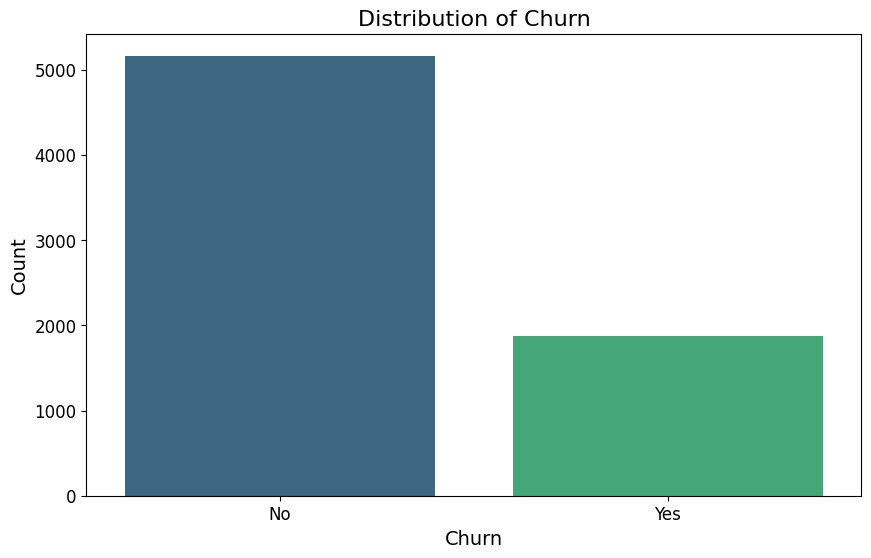

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='Churn', palette='viridis')
plt.title('Distribution of Churn', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The dataset looks highly imbalanced. It would help to use sampling methods before training the model to prevent bias.

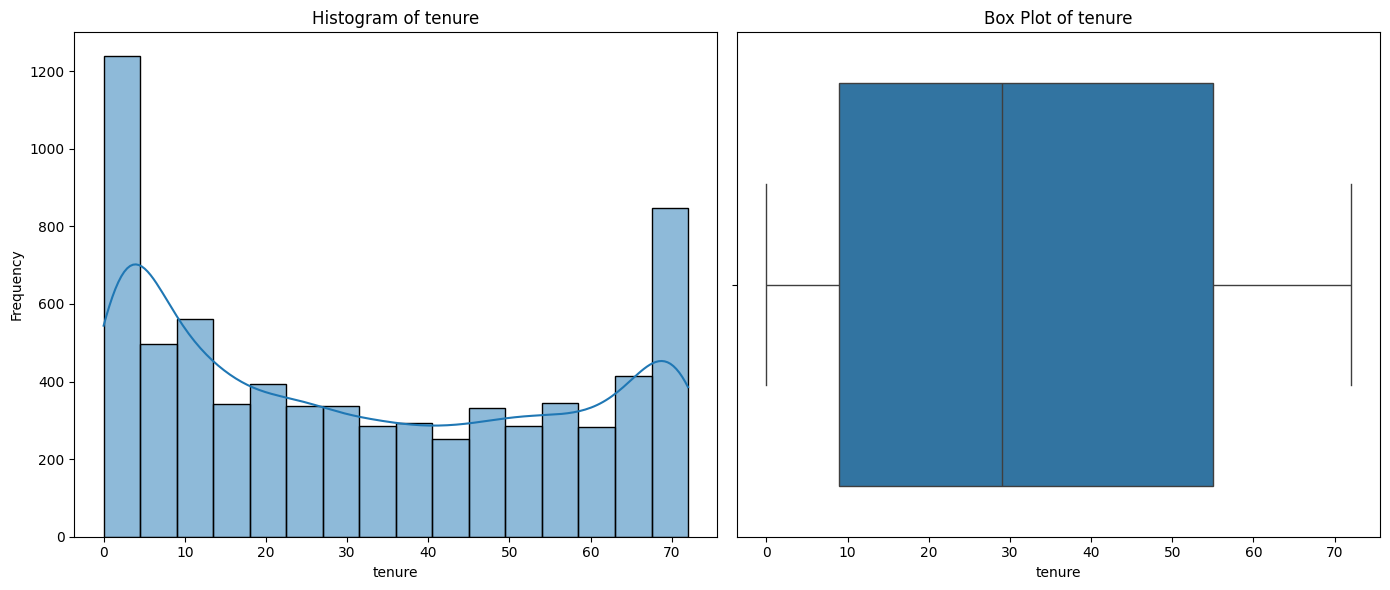

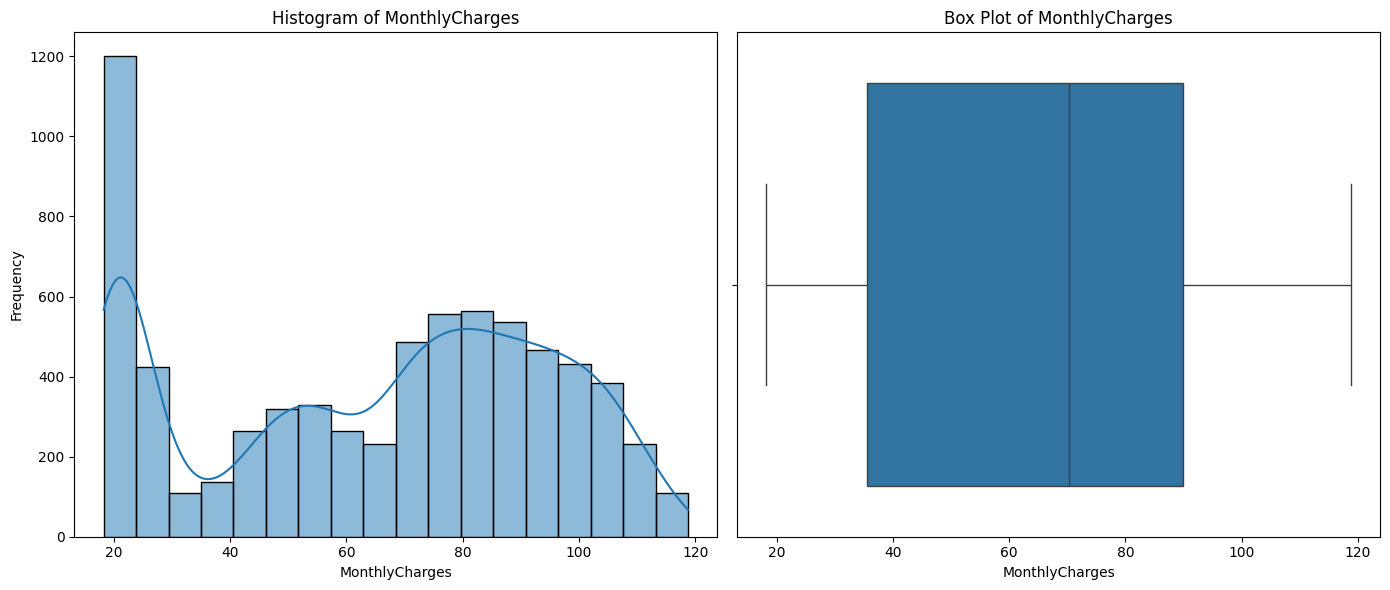

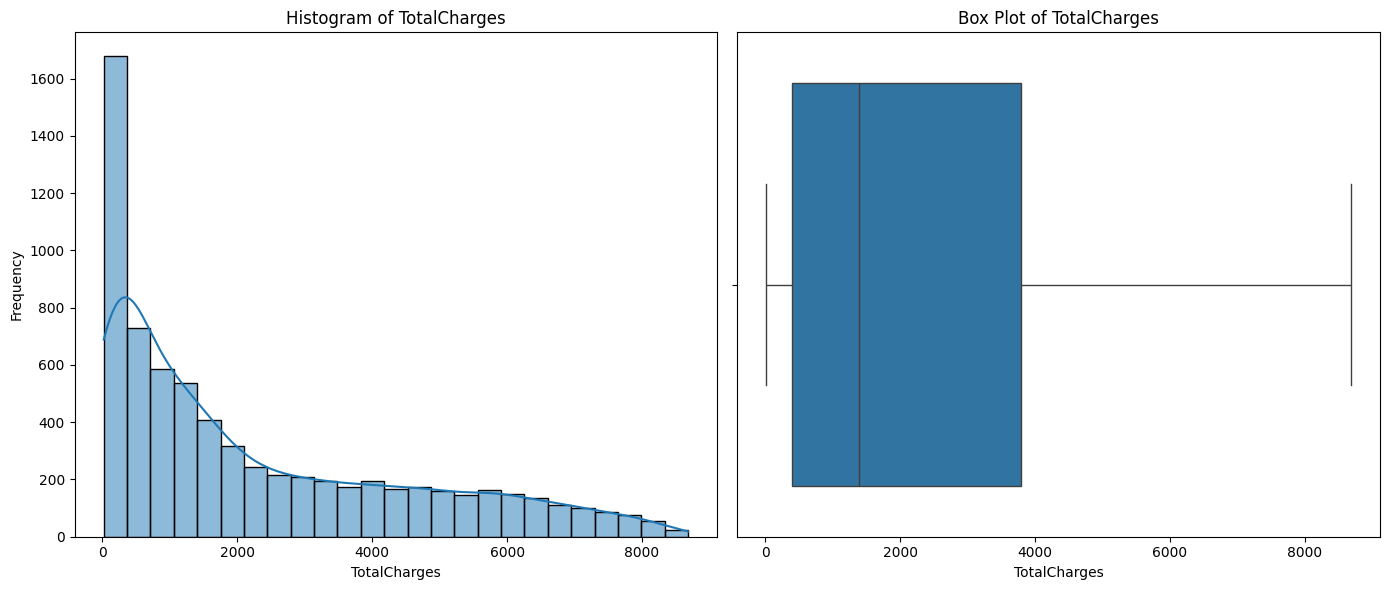

In [28]:
numerical_columns = new_data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(new_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=new_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

Key Takeaways:
- Tenure: There seems to be peaks conisting of new customers who could be the highest risk of churn and then the loyal customers who are at a lower risk of churn but special measures needs be taken reward their loyalty. There are no outliers so the data is consistent with have of the customers with the service for about 30 months and with a max 70 months tenure.

- Monthly Charges: We see a bimodal distribution here as well, there could be a good amount of people with a basic plan while another group of people with add-ons which could be the reason for the monthly charge ranging from 20-120. There are no outliers so data seems to be consistent.

- Total Charges: The total charges closely dpends on the tenure and the monthly charges the person has paid over the months. The histogram shows a highly right skewed distribution meaning the average of the total charge is much lesser than the total charge paid by 50% of the customers.
    

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


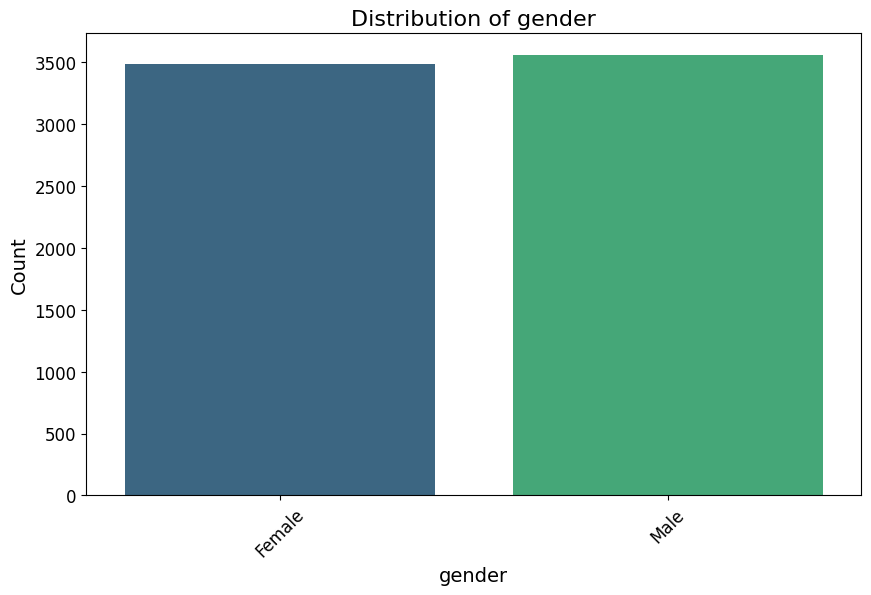

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


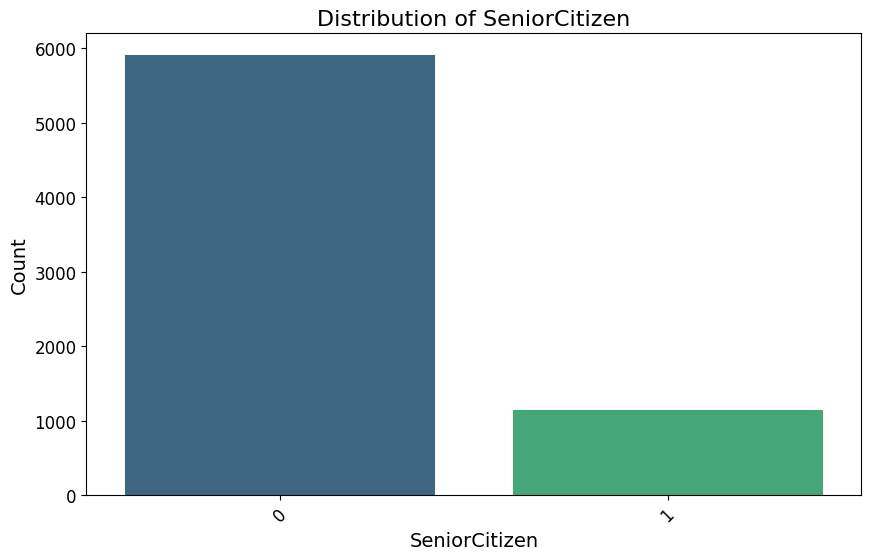

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


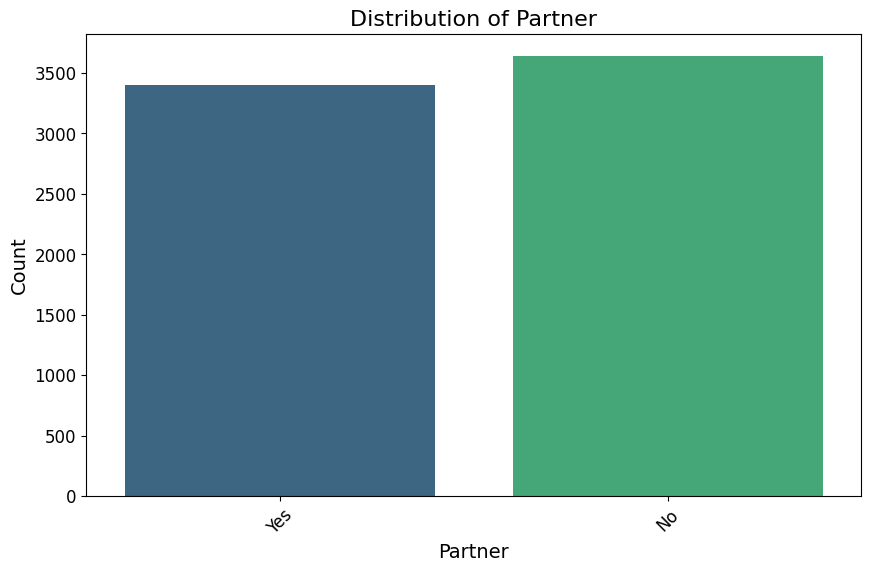

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


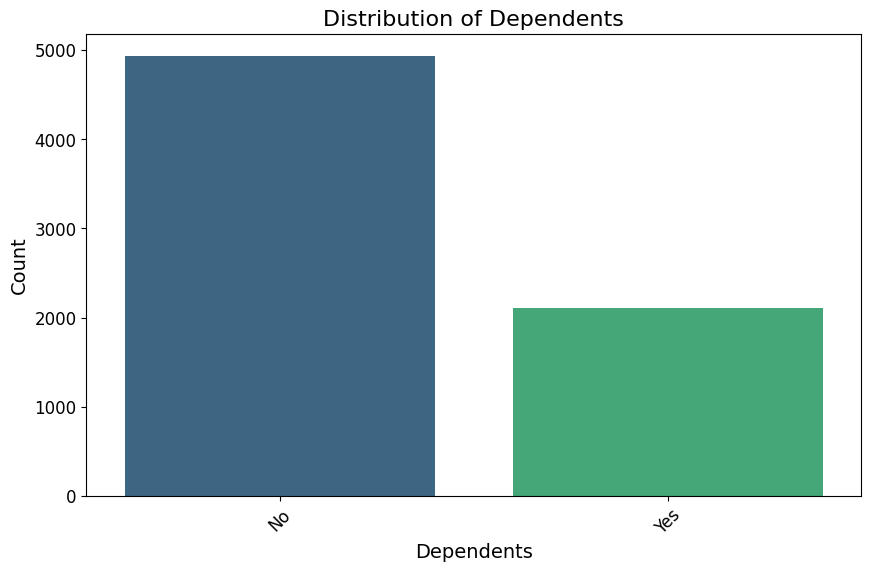

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


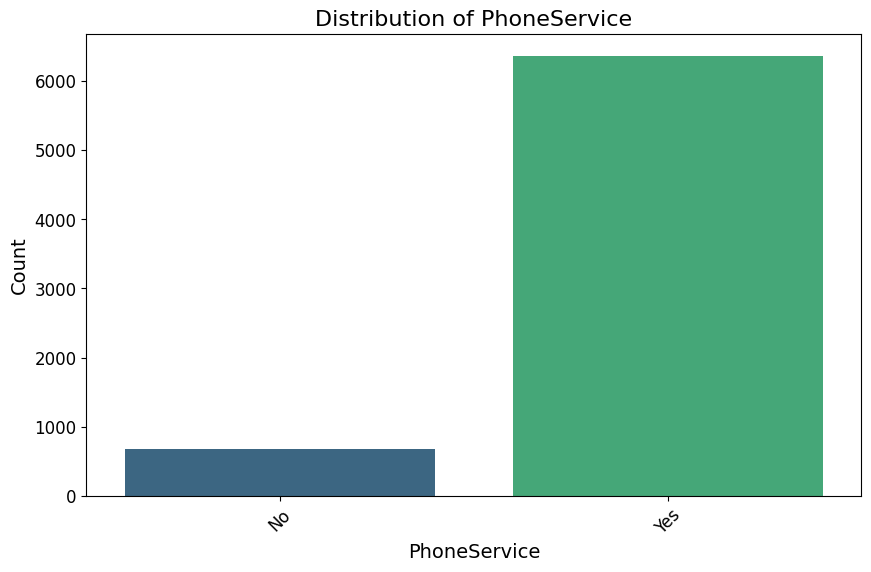

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


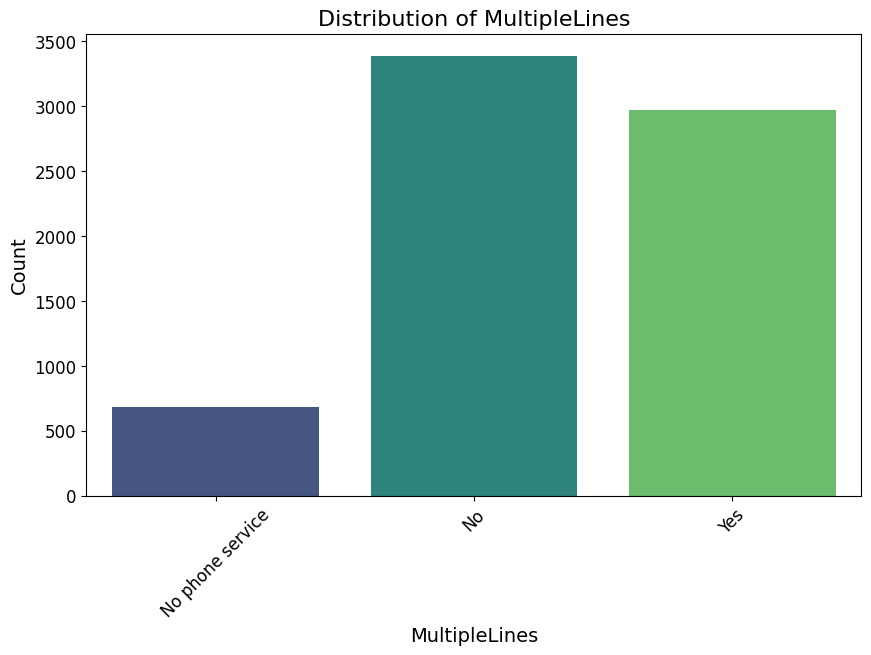

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


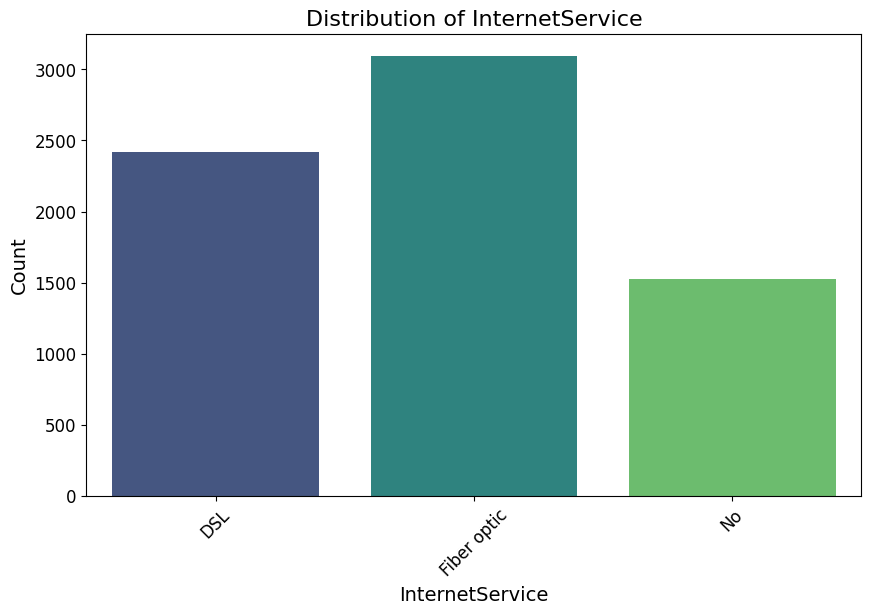

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


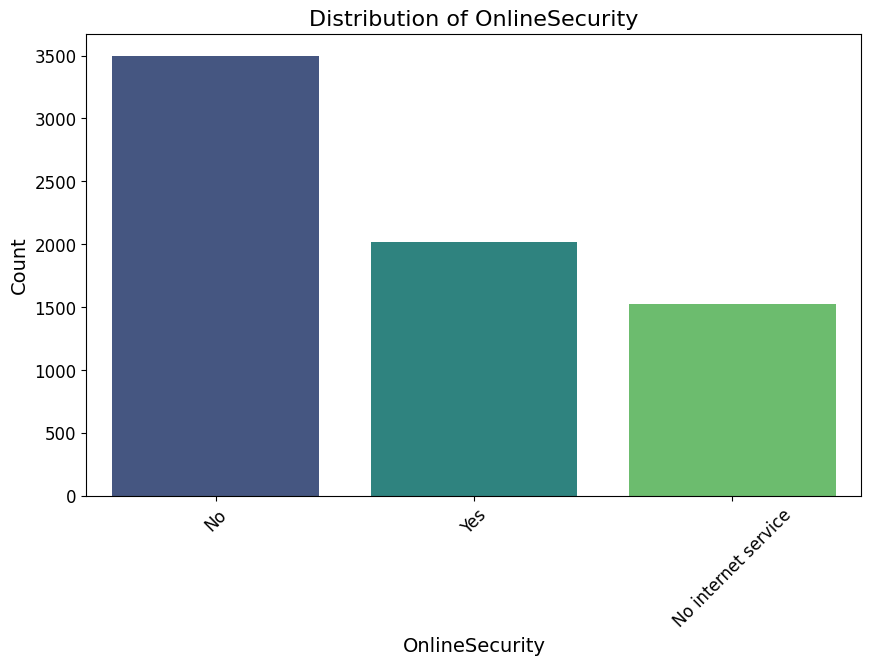

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


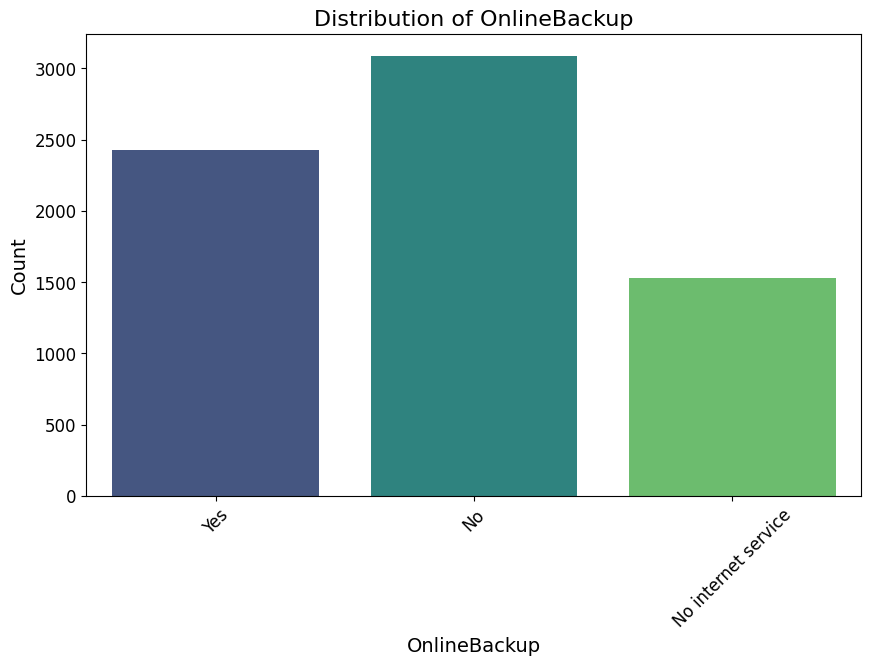

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


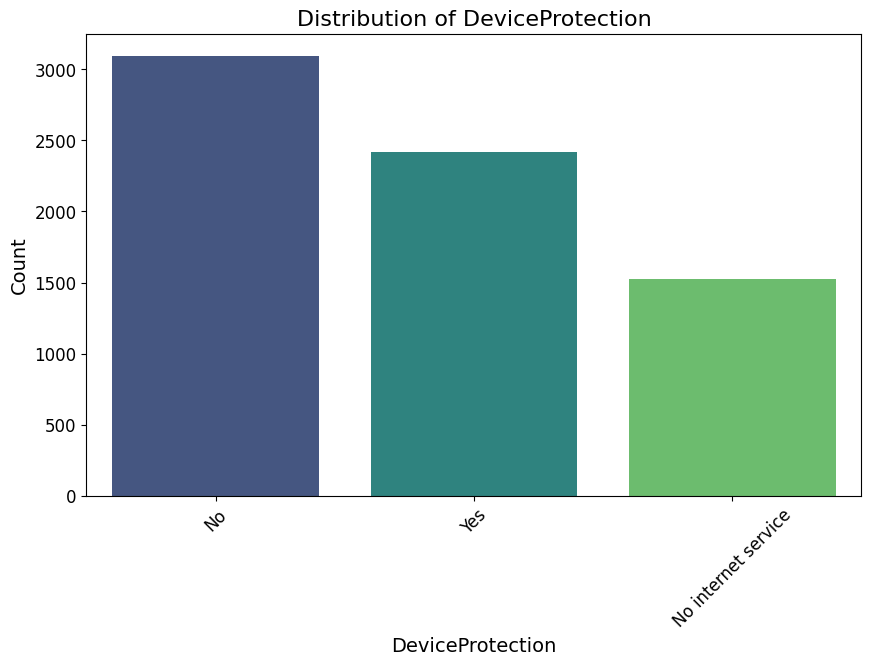

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


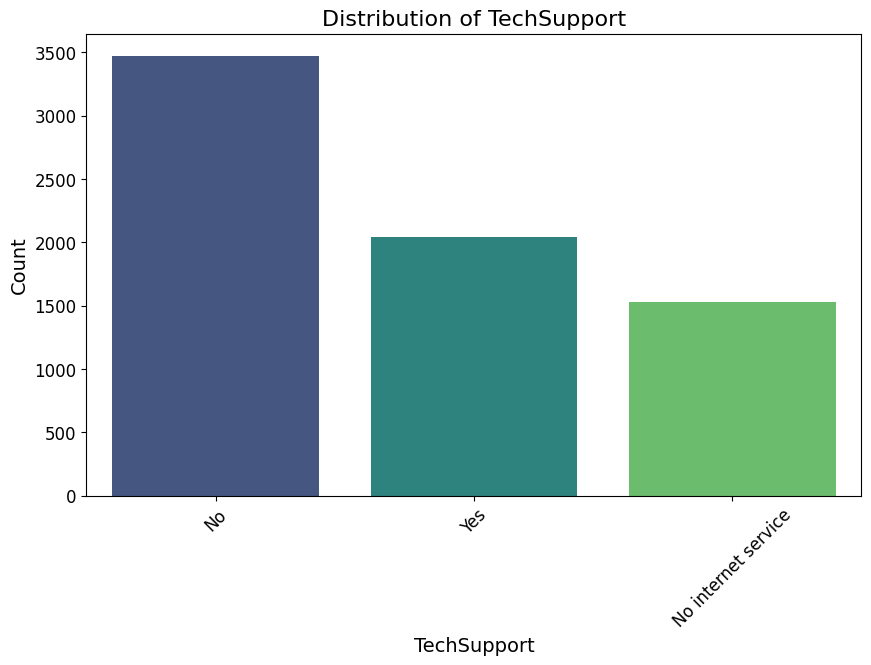

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


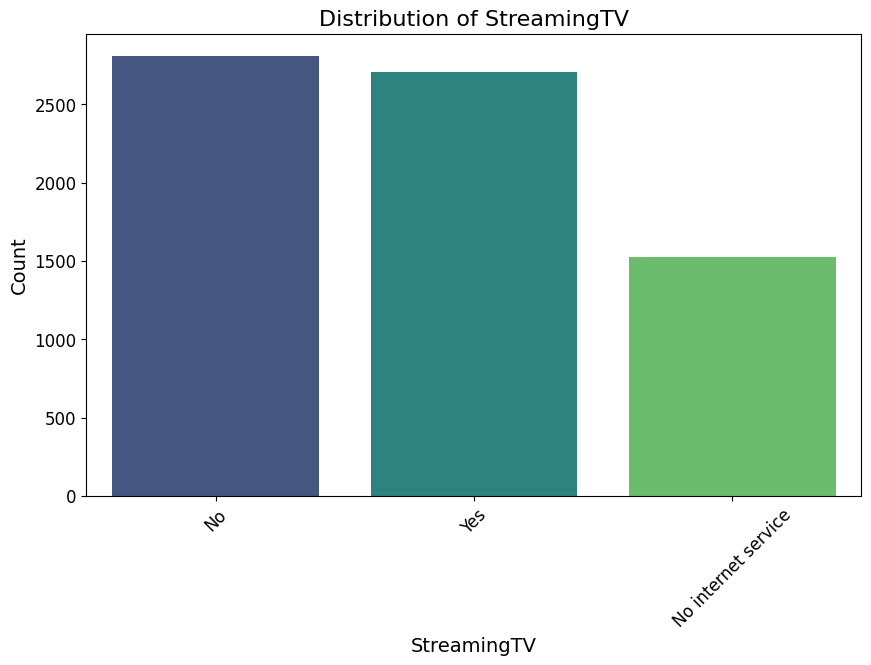

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


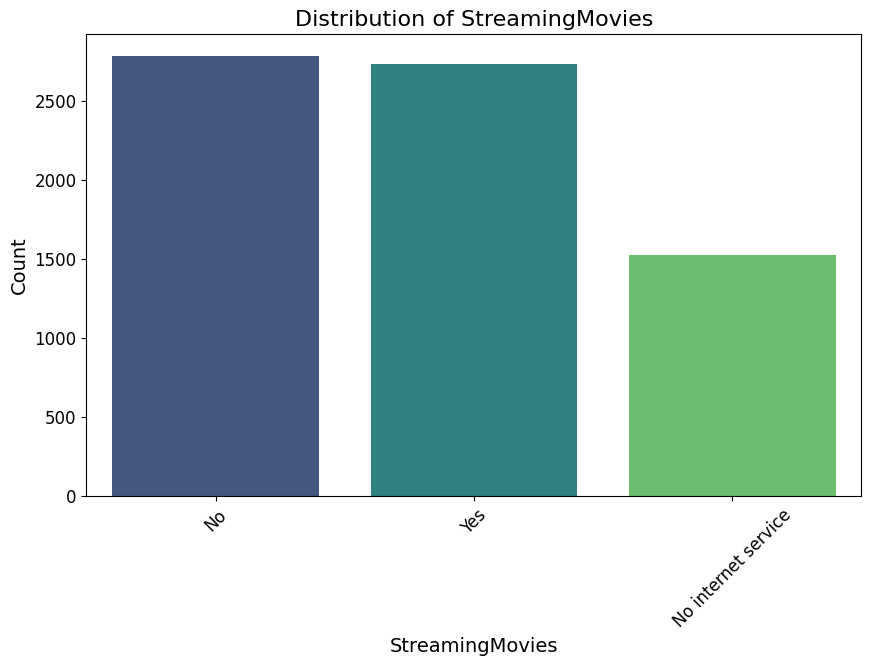

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


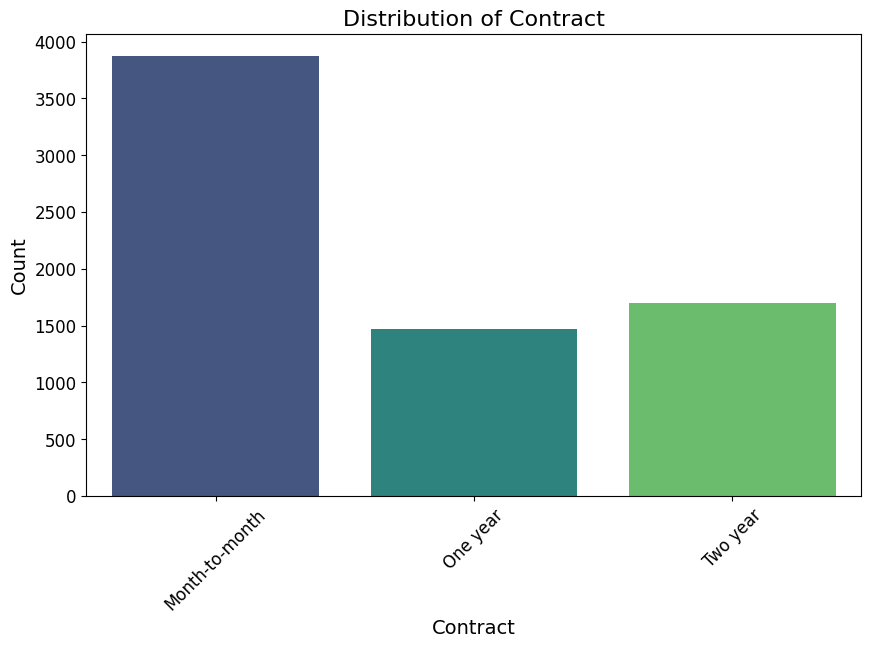

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


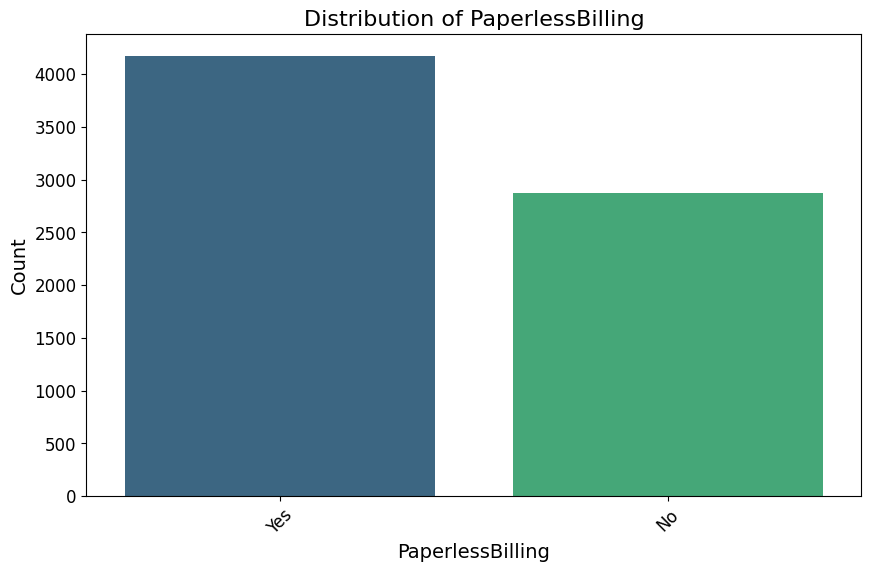

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


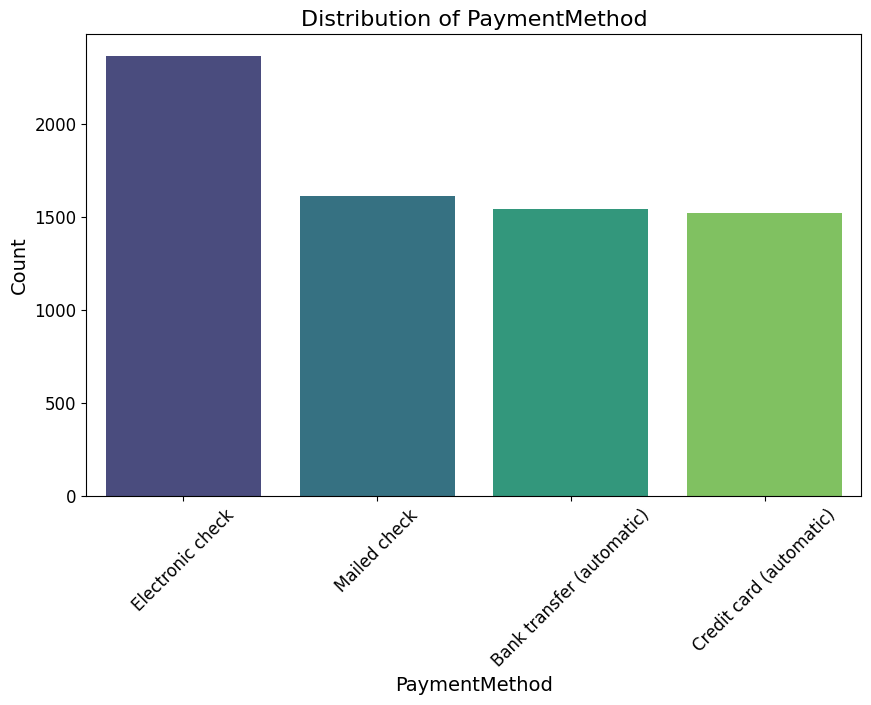

/var/folders/70/bv9d2gzn4373dn9w5fts5_f40000gp/T/ipykernel_29179/3945210704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_data, x=column, palette='viridis')


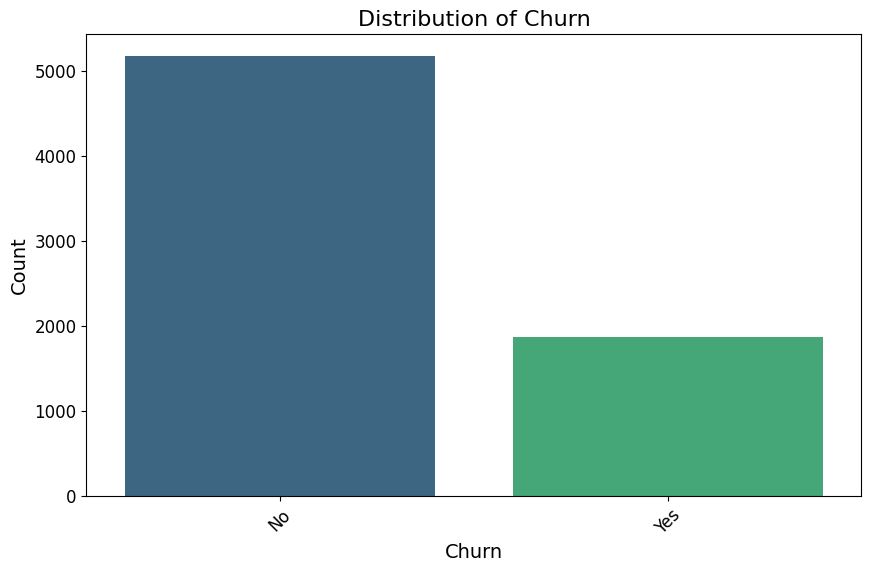

In [29]:
object_columns = new_data.select_dtypes(include='object').columns
for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=new_data, x=column, palette='viridis')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Key Takeaways:
- The data is balanced in terms of Gender.
- There are lesser Senior Citizens in the sample
- A good amount of cutomers do not have a partner or dependents.
- A majority of the customers have a phone service either with single or nultiple lines.
- Fiber Optic seems to be a popular choice among Internet services though most of them have not opted for add-ons like Online Backup, Online Security, Tech Support.
- Month-to-month contract seems to be another popular choice which could be considered as a factor for churn
- Most customers seem to making their payments through Electronic payment.

### Bi-variate Analysis

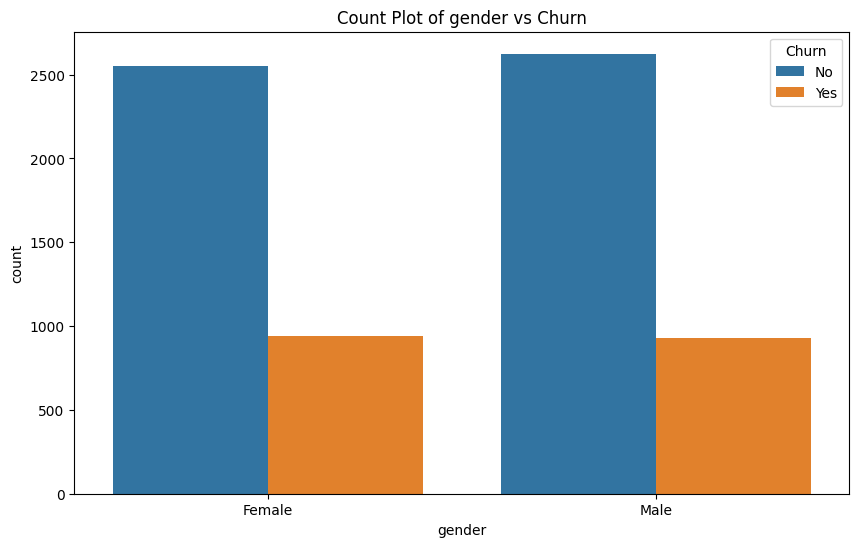

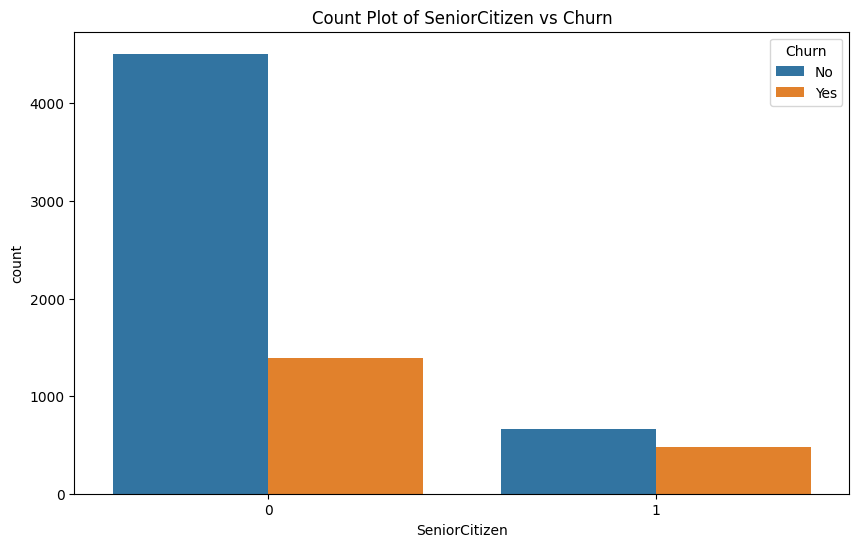

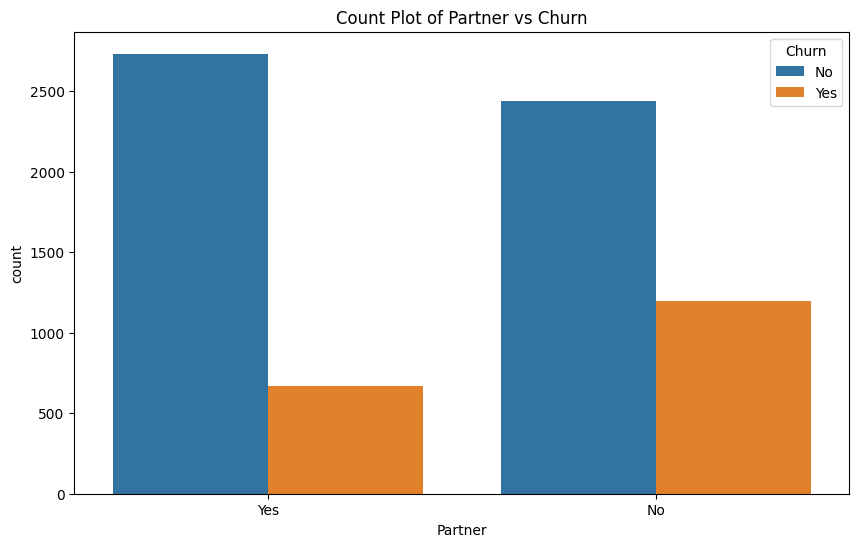

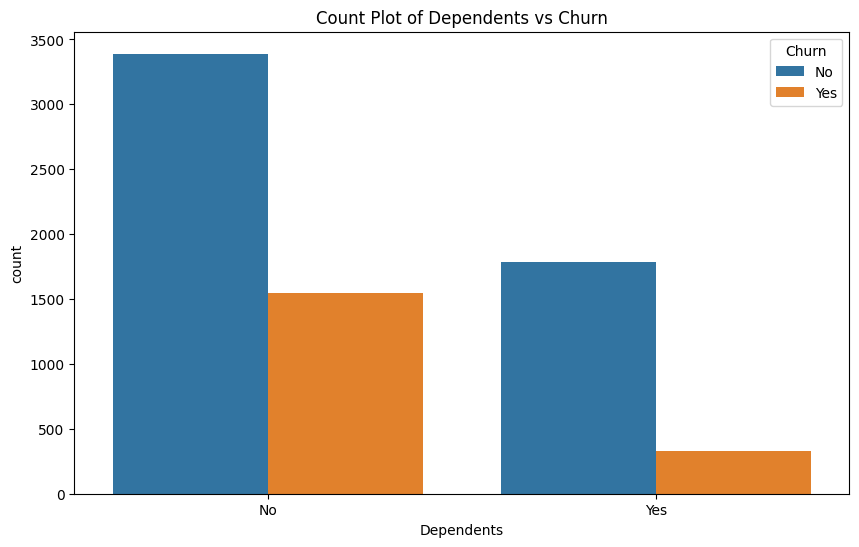

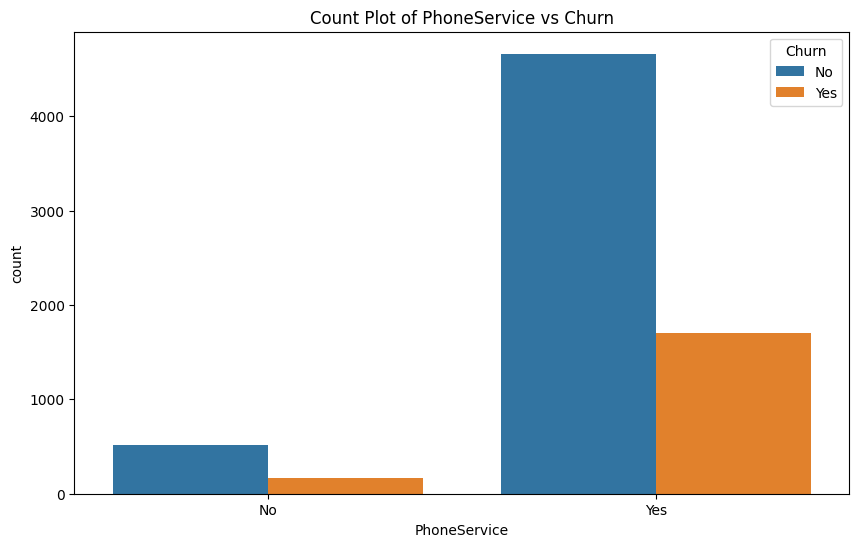

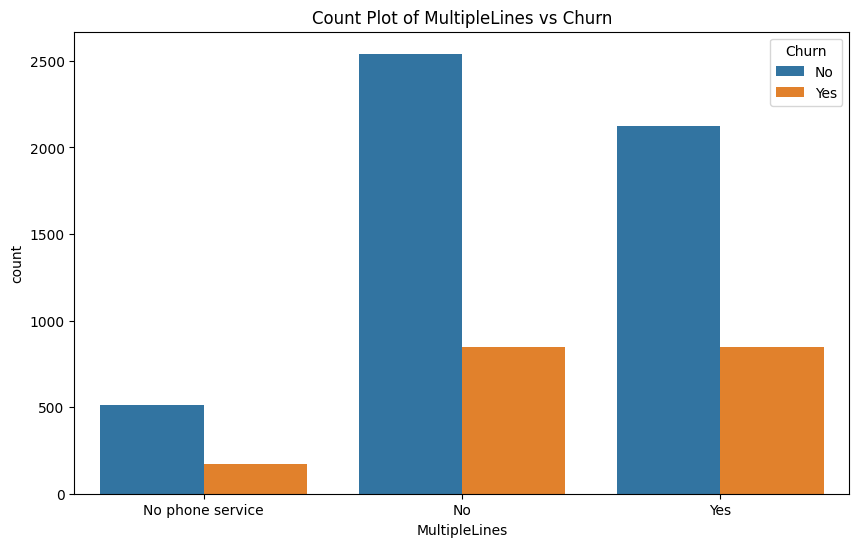

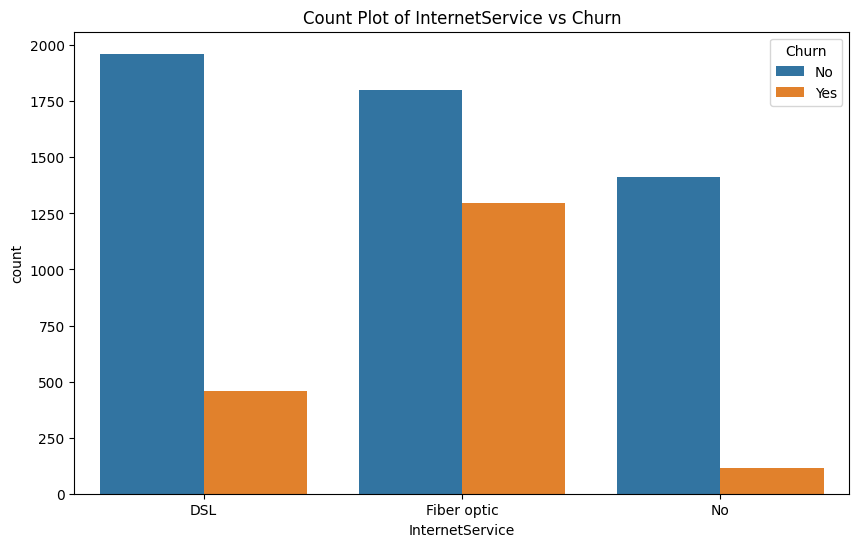

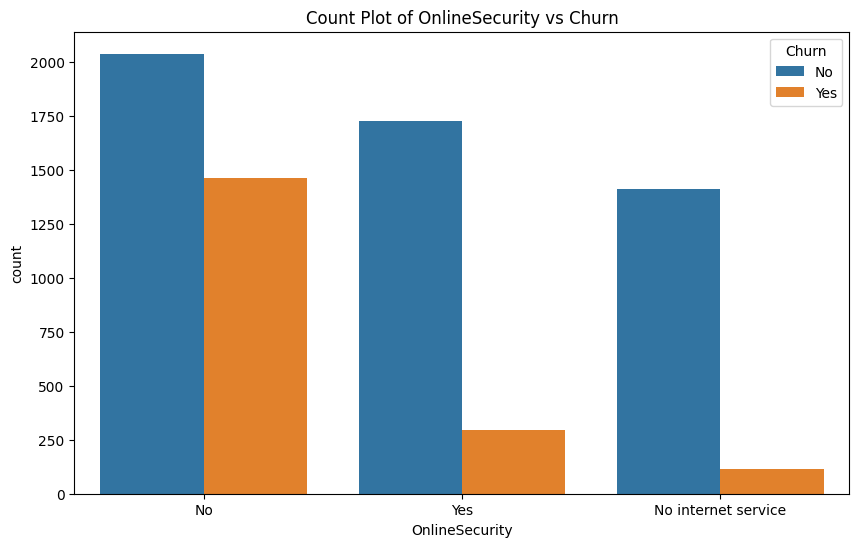

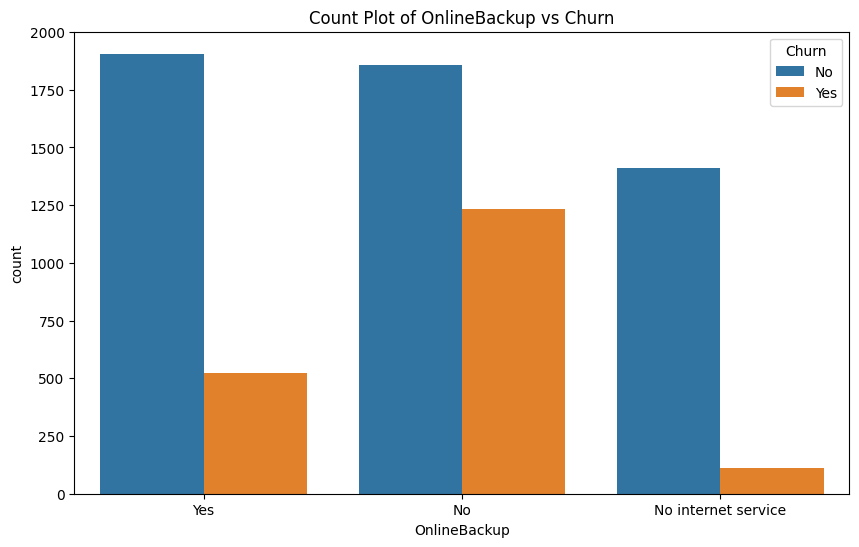

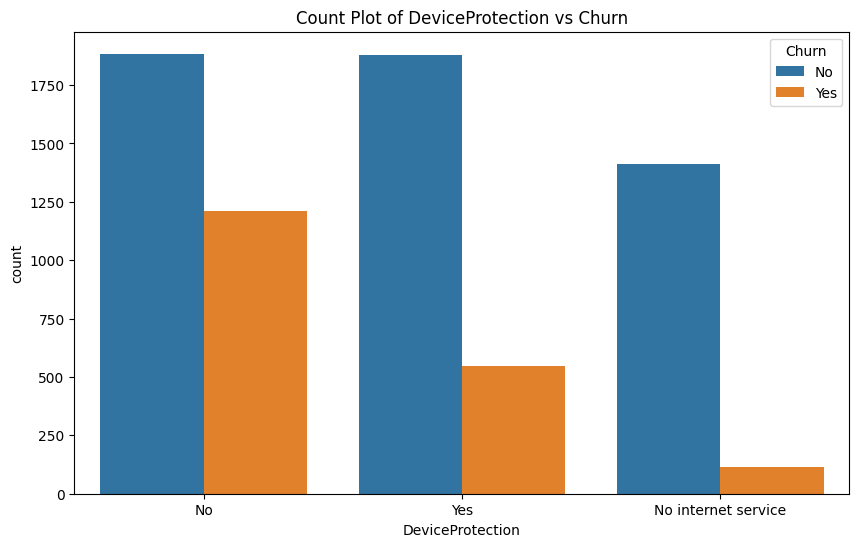

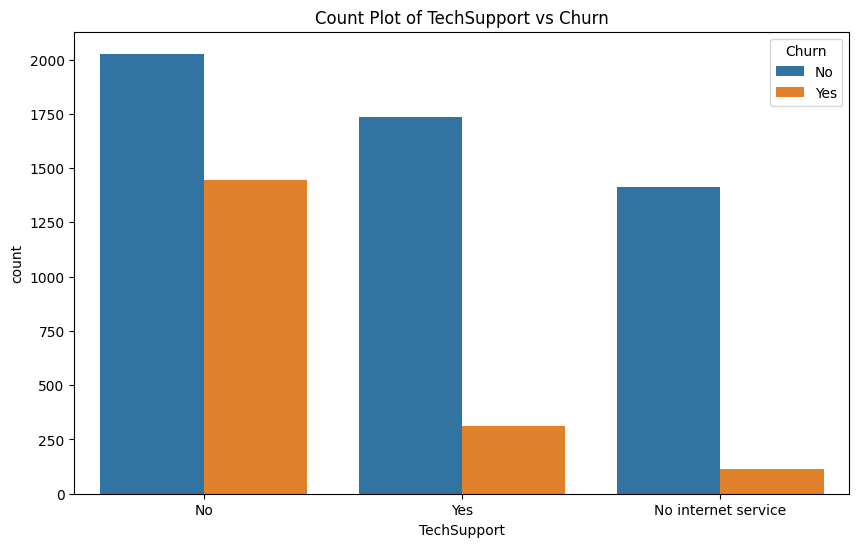

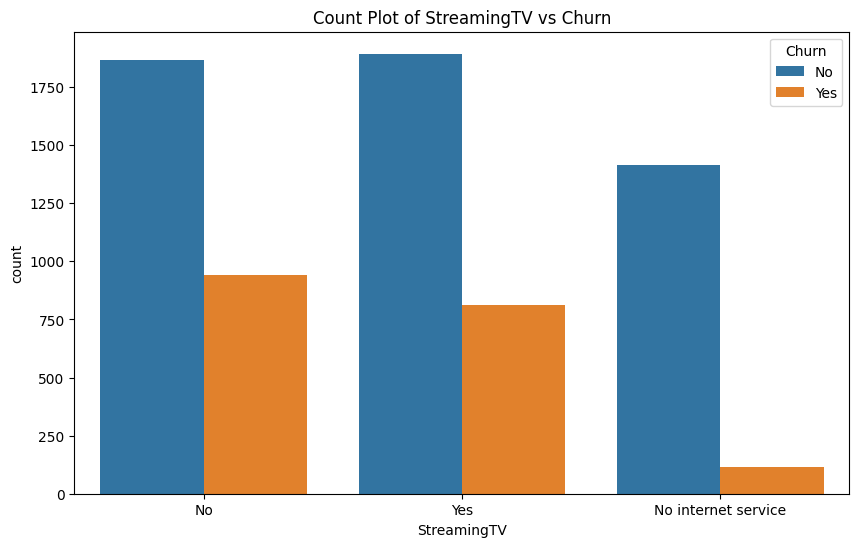

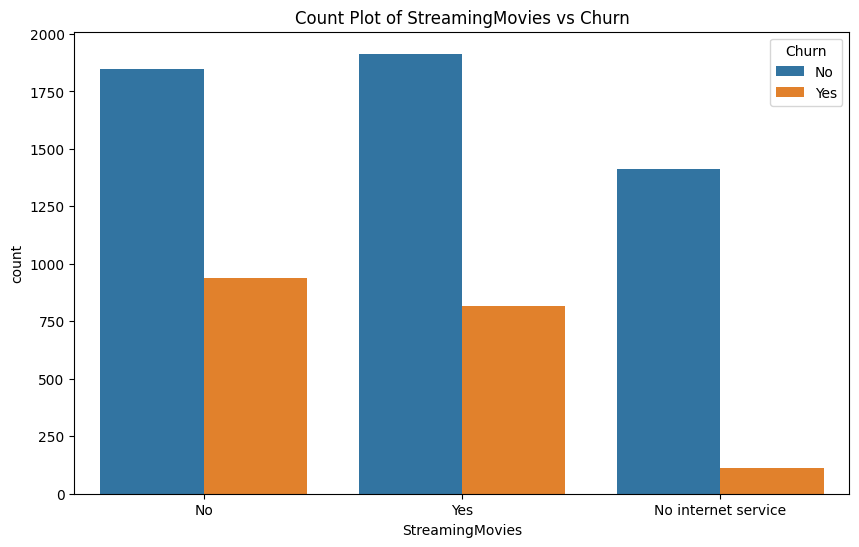

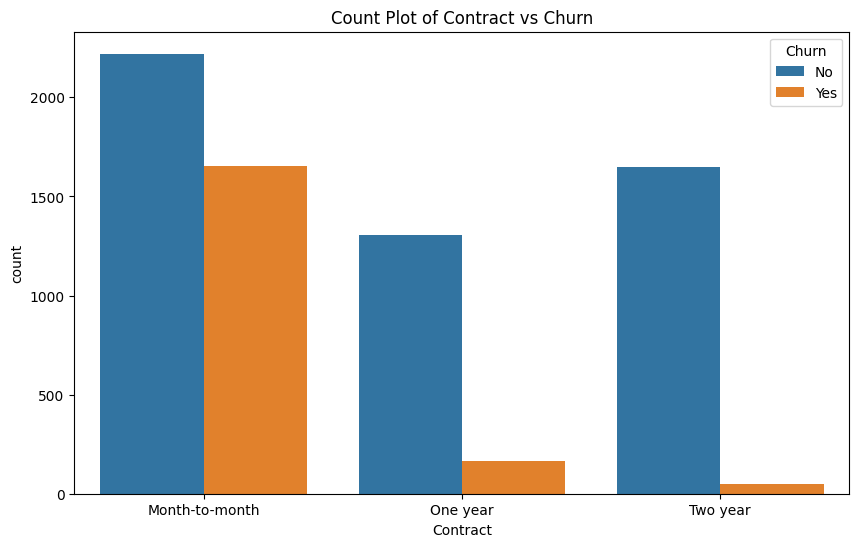

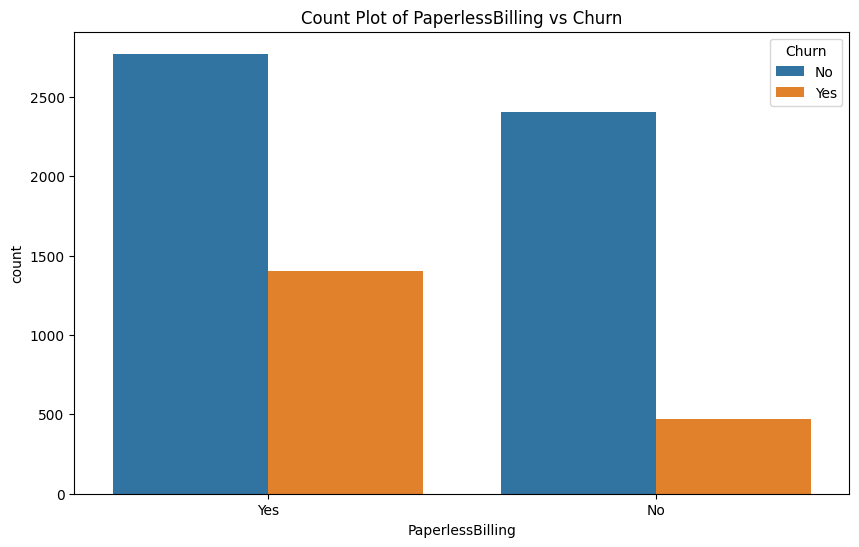

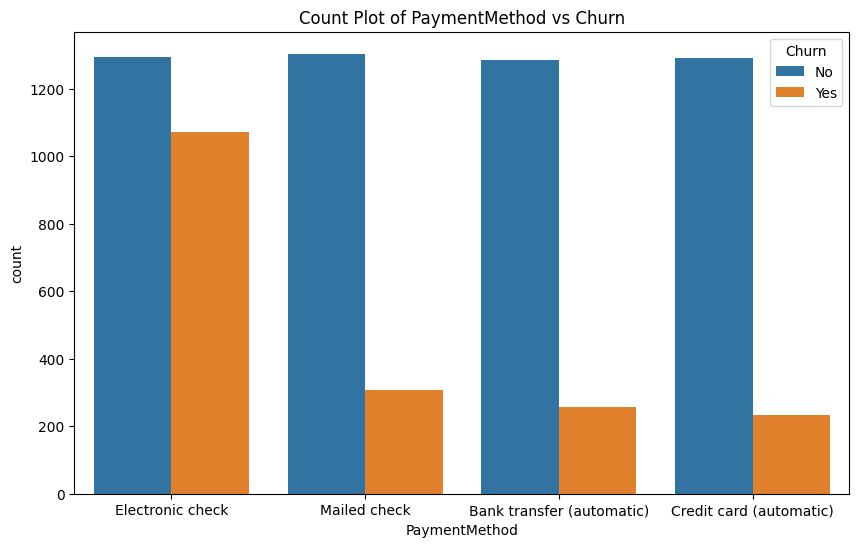

In [73]:
for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=new_data, x=column, hue='Churn')
    plt.title(f'Count Plot of {column} vs Churn')
    plt.show()

Key Takeaways:
- Churn seems to be higher among those who opted for Fiber Optics internet service. In addition, churn is also higher among those who have not opted for the add-ons.
- As expected the ones on a month-on-month contract and those who pay by electronic cheque are the ones with highest churn. Many companies offer discounts for auto-pay via credit/debit card which they might be missing which could make it less affordable. Opting for a manual payment option could also suggest their less usage of digital services.

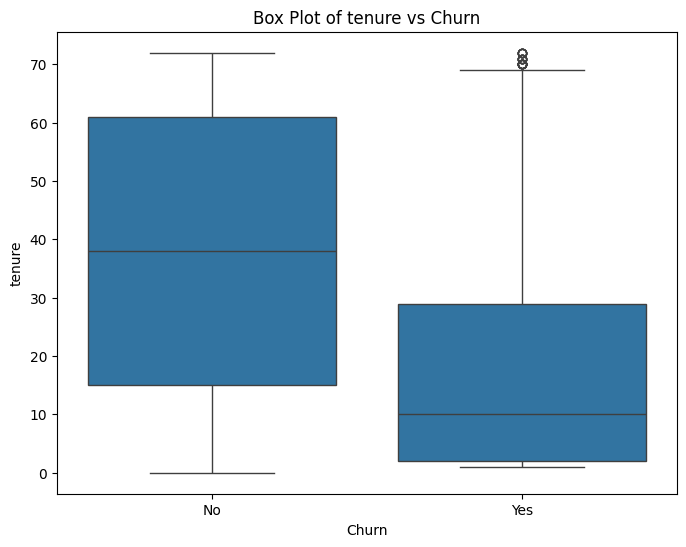

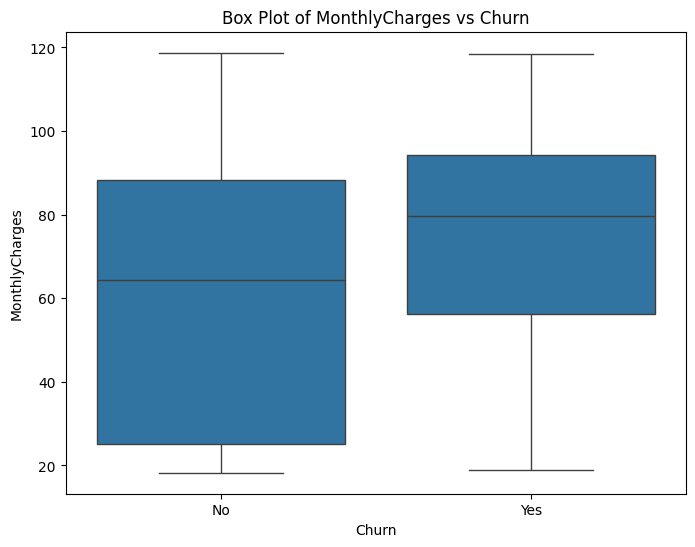

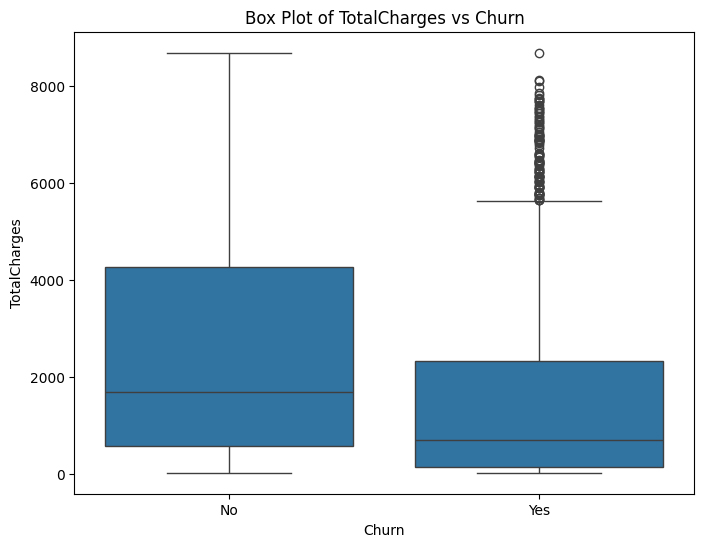

In [67]:
# Identify numerical columns
numerical_columns = new_data.select_dtypes(include=[np.number]).columns

# Perform bivariate analysis on numerical columns vs Churn
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=column, data=new_data)
    plt.title(f'Box Plot of {column} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()

Key Takeaways:
- The churn seems to higher among the new customers who are attaches with the company/product.
- Higher monthly charges is a factor which leads them to look for other products with competitive prices.
- Churn among the lower total charge is dependent on tenure making the new customers the target to impress to reduce churn.

### Feature Correlation Analysis

                 tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


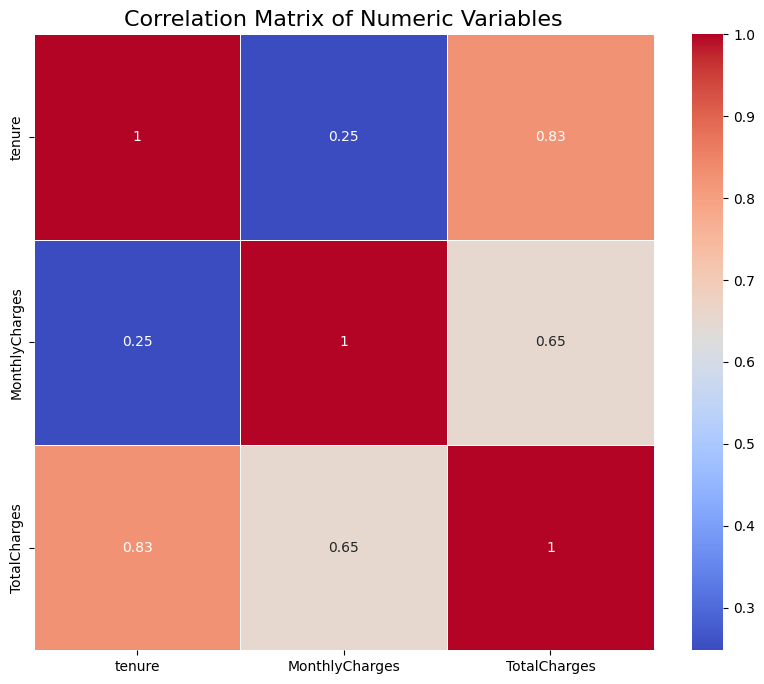

In [70]:
correlation_matrix = new_data[numerical_columns].corr()
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
plt.show()

The correlation plot proves the relation between tenure and total charges

#### Chi-Square Test for Categorical Variables

In [68]:
from scipy.stats import chi2_contingency


# Perform Chi-square test for each categorical variable against 'Churn'
for column in object_columns:
    contingency_table = pd.crosstab(new_data[column], new_data['Churn'])
    print(contingency_table)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column} vs Churn:")
    print(f"Chi2 Statistic: {chi2}, p-value: {p}")
    if p < 0.05:
        print(f"There is a signicant relationship between {column} and Churn \n")
    else:
        print(f"There is no signicant relationship between {column} and Churn \n")

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Chi-square test for gender vs Churn:
Chi2 Statistic: 0.4840828822091383, p-value: 0.48657873605618596
There is no signicant relationship between gender and Churn 

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476
Chi-square test for SeniorCitizen vs Churn:
Chi2 Statistic: 159.42630036838742, p-value: 1.5100668050923772e-36
There is a signicant relationship between SeniorCitizen and Churn 

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
Chi-square test for Partner vs Churn:
Chi2 Statistic: 158.7333820309922, p-value: 2.139911344075994e-36
There is a signicant relationship between Partner and Churn 

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
Chi-square test for Dependents vs Churn:
Chi2 Statistic: 189.12924940423474, p-value: 4.924921661215422e-43
There is a signicant relationship 

Based on the results of the Chi-square Test it looks like Gender and Phone service do not play and important role in Churn and can hence be dropped from the predictive model features.